# CSE474/574 - Programming Assignment 2

## Part 2 - Image Classification

Additional library requirement: `Pillow`. See [here](https://anaconda.org/anaconda/pillow) for installation instructions.

For this part, we will use `keras` with a `tensorflow` backend, instead of directly using `tensorflow`, as in Part 1. See [here](https://anaconda.org/conda-forge/keras) for installation instructions.

In [1]:
from __future__ import print_function
from keras.models import Sequential
from keras.layers import Dense, Activation

import numpy as np
import random as rd
import time
import pickle
import os
from PIL import Image
#os.environ["CUDA_VISIBLE_DEVICES"]="1"
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [15]:
def resize_images(data,size):

    '''
    Resize images in a given data matrix (1 per row) to the specified size in the tuple - size.
    '''
    resized_data = np.empty((data.shape[0],size[0]*size[1]))
    for i in range(data.shape[0]):
        d = (np.array(Image.fromarray(data[i,:].reshape((28,28))).resize(size))).flatten()
        resized_data[i,:] = d
    
    return resized_data      

In [16]:
classes = ['apple', 'airplane', 'basketball', 'axe', 'banana', 'horse', 'arm', 'alarm clock', 'ant', 'bed']

In [28]:
# Preparing the data set
with open('AI_quick_draw.pickle', 'rb') as open_ai_quick:
    data_train = pickle.load(open_ai_quick)
    data_train = resize_images(data_train,(10,10))
    label_train1 = pickle.load(open_ai_quick)
    data_test = pickle.load(open_ai_quick)
    data_test = resize_images(data_test,(10,10))
    label_test1 = pickle.load(open_ai_quick)
n_classes = len(np.unique(label_train1))
# convert labels to 0-1 hot encoding
label_train = np.zeros((label_train1.shape[0], n_classes))
a = np.arange(label_train1.shape[0], dtype=np.int64)
b = np.array(label_train1, dtype=np.int64).reshape((label_train1.shape[0],))
label_train[a, b] = 1

label_test = np.zeros((label_test1.shape[0], n_classes))
c = np.arange(label_test1.shape[0], dtype=np.int64)
d = np.array(label_test1, dtype=np.int64).reshape((label_test1.shape[0],))
label_test[c, d] = 1

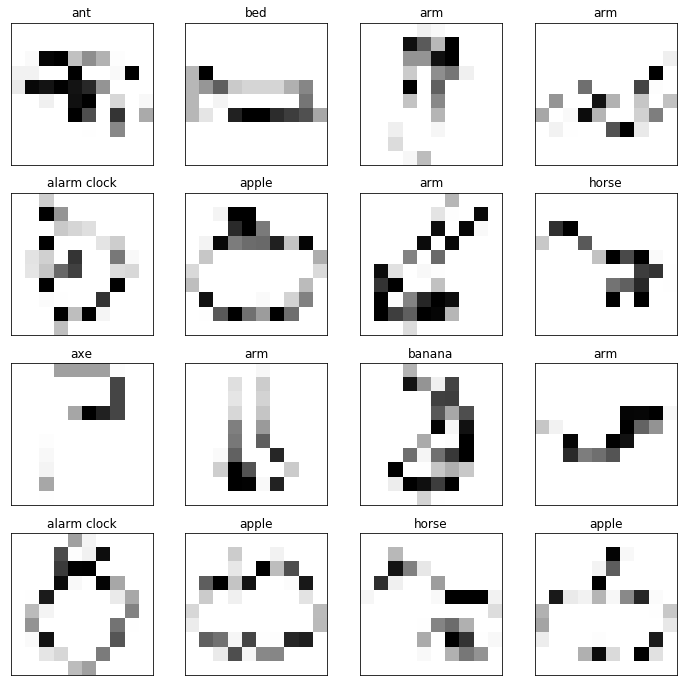

In [29]:
# visualize some images
fig = plt.figure(figsize=[12,12])
for i in range(16):
    ax = plt.subplot(4,4,i+1)    
    ind = np.random.randint(0,data_train.shape[0])
    plt.imshow(data_train[ind,:].reshape((10,10)),cmap='Greys')
    plt.xticks([])
    plt.yticks([])
    t = plt.title(classes[int(label_train1[ind])])

In [25]:
# for some macosx installations, conflicting copies of mpilib causes trouble with tensorflow.
# use the following two lines to resolve that issue
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

**WARNING**: This cell will take a significantly long time to run

In [26]:
import time

In [27]:
start_time = time.time()
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=data_train.shape[1]))
# you can add more Dense layers here
# model.add(Dense(256, activation='relu')) 
# model.add(Dense(256, activation='relu')) 
# model.add(Dense(256, activation='relu')) 
# model.add(Dense(256, activation='relu')) 
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(data_train, label_train, epochs=500, batch_size=32)
duration = time.time() - start_time
predict_train = model.predict_classes(data_train)
acc_train = np.where(label_train1 == predict_train)[0].shape[0]/data_train.shape[0]
print('Training accuracy {}'.format(acc_train))
predict_test = model.predict_classes(data_test)
acc_test = np.where(label_test1 == predict_test)[0].shape[0]/data_test.shape[0]
print('Testing accuracy {}'.format(acc_test))
print('Time elapsed - {} seconds.'.format(duration))

Epoch 1/500
100000/100000 [==============================] - 6s 62us/step - loss: 9.7652 - acc: 0.3539
Epoch 2/500
100000/100000 [==============================] - 6s 65us/step - loss: 8.4159 - acc: 0.3962
Epoch 3/500
100000/100000 [==============================] - 4s 42us/step - loss: 6.3367 - acc: 0.3911
Epoch 4/500
100000/100000 [==============================] - 4s 42us/step - loss: 5.8044 - acc: 0.4104
Epoch 5/500
100000/100000 [==============================] - 5s 49us/step - loss: 5.7899 - acc: 0.4173
Epoch 6/500
100000/100000 [==============================] - 4s 45us/step - loss: 4.1998 - acc: 0.4497
Epoch 7/500
100000/100000 [==============================] - 4s 42us/step - loss: 1.7380 - acc: 0.5223
Epoch 8/500
100000/100000 [==============================] - 6s 64us/step - loss: 1.6273 - acc: 0.5335: 0s - loss: 1.6297 - ac
Epoch 9/500
100000/100000 [==============================] - 5s 47us/step - loss: 1.6178 - acc: 0.5333
Epoch 10/500
100000/100000 [=====================

100000/100000 [==============================] - 4s 45us/step - loss: 7.4297 - acc: 0.5359
Epoch 80/500
100000/100000 [==============================] - 6s 58us/step - loss: 7.4460 - acc: 0.5349
Epoch 81/500
100000/100000 [==============================] - 4s 45us/step - loss: 7.4805 - acc: 0.5331
Epoch 82/500
100000/100000 [==============================] - 5s 46us/step - loss: 7.4591 - acc: 0.5341
Epoch 83/500
100000/100000 [==============================] - 5s 51us/step - loss: 7.3976 - acc: 0.5381
Epoch 84/500
100000/100000 [==============================] - 5s 47us/step - loss: 7.4309 - acc: 0.5361
Epoch 85/500
100000/100000 [==============================] - 5s 45us/step - loss: 7.4611 - acc: 0.5342
Epoch 86/500
100000/100000 [==============================] - 6s 60us/step - loss: 7.4421 - acc: 0.5353
Epoch 87/500
100000/100000 [==============================] - 5s 46us/step - loss: 7.4706 - acc: 0.5337
Epoch 88/500
100000/100000 [==============================] - 5s 48us/step - 

100000/100000 [==============================] - 5s 53us/step - loss: 7.4225 - acc: 0.5376
Epoch 158/500
100000/100000 [==============================] - 5s 46us/step - loss: 7.4954 - acc: 0.5330
Epoch 159/500
100000/100000 [==============================] - 5s 47us/step - loss: 7.4116 - acc: 0.5381
Epoch 160/500
100000/100000 [==============================] - 6s 60us/step - loss: 7.3279 - acc: 0.5435
Epoch 161/500
100000/100000 [==============================] - 5s 46us/step - loss: 7.3798 - acc: 0.5401
Epoch 162/500
100000/100000 [==============================] - 5s 46us/step - loss: 7.3874 - acc: 0.5398
Epoch 163/500
100000/100000 [==============================] - 5s 49us/step - loss: 7.4141 - acc: 0.5381
Epoch 164/500
100000/100000 [==============================] - 5s 53us/step - loss: 7.4584 - acc: 0.5353
Epoch 165/500
100000/100000 [==============================] - 5s 47us/step - loss: 7.4276 - acc: 0.5371
Epoch 166/500
100000/100000 [==============================] - 5s 47u

100000/100000 [==============================] - 5s 45us/step - loss: 7.4729 - acc: 0.5348
Epoch 235/500
100000/100000 [==============================] - 5s 45us/step - loss: 7.4552 - acc: 0.5360
Epoch 236/500
100000/100000 [==============================] - 6s 61us/step - loss: 7.4105 - acc: 0.5387
Epoch 237/500
100000/100000 [==============================] - 5s 46us/step - loss: 7.4481 - acc: 0.5365
Epoch 238/500
100000/100000 [==============================] - 5s 53us/step - loss: 7.4732 - acc: 0.5349
Epoch 239/500
100000/100000 [==============================] - 5s 45us/step - loss: 7.4811 - acc: 0.5345
Epoch 240/500
100000/100000 [==============================] - 6s 60us/step - loss: 7.4685 - acc: 0.5353
Epoch 241/500
100000/100000 [==============================] - 4s 42us/step - loss: 7.4603 - acc: 0.5357
Epoch 242/500
100000/100000 [==============================] - 5s 46us/step - loss: 7.4618 - acc: 0.5356
Epoch 243/500
100000/100000 [==============================] - 5s 52u

100000/100000 [==============================] - 5s 53us/step - loss: 7.5070 - acc: 0.5331
Epoch 313/500
100000/100000 [==============================] - 5s 47us/step - loss: 7.4994 - acc: 0.5336
Epoch 314/500
100000/100000 [==============================] - 5s 47us/step - loss: 7.4911 - acc: 0.5342
Epoch 315/500
100000/100000 [==============================] - 6s 60us/step - loss: 7.4738 - acc: 0.5353
Epoch 316/500
100000/100000 [==============================] - 5s 46us/step - loss: 7.4873 - acc: 0.5344
Epoch 317/500
100000/100000 [==============================] - 5s 46us/step - loss: 7.5043 - acc: 0.5335
Epoch 318/500
100000/100000 [==============================] - 5s 45us/step - loss: 7.5165 - acc: 0.5326
Epoch 319/500
100000/100000 [==============================] - 5s 53us/step - loss: 7.5837 - acc: 0.5286
Epoch 320/500
100000/100000 [==============================] - 5s 49us/step - loss: 7.5609 - acc: 0.5301
Epoch 321/500
100000/100000 [==============================] - 5s 46u

100000/100000 [==============================] - 5s 46us/step - loss: 7.5727 - acc: 0.5292
Epoch 391/500
100000/100000 [==============================] - 5s 49us/step - loss: 7.5047 - acc: 0.5336
Epoch 392/500
100000/100000 [==============================] - 5s 53us/step - loss: 7.5323 - acc: 0.5319
Epoch 393/500
100000/100000 [==============================] - 5s 45us/step - loss: 7.5477 - acc: 0.5309
Epoch 394/500
100000/100000 [==============================] - 5s 46us/step - loss: 7.5429 - acc: 0.5312
Epoch 395/500
100000/100000 [==============================] - 6s 60us/step - loss: 7.5993 - acc: 0.5275
Epoch 396/500
100000/100000 [==============================] - 5s 46us/step - loss: 7.5905 - acc: 0.5282
Epoch 397/500
100000/100000 [==============================] - 4s 45us/step - loss: 7.5429 - acc: 0.5312
Epoch 398/500
100000/100000 [==============================] - 5s 46us/step - loss: 7.5304 - acc: 0.5322
Epoch 399/500
100000/100000 [==============================] - 5s 52u

100000/100000 [==============================] - 5s 48us/step - loss: 7.5696 - acc: 0.5297: 1s - l
Epoch 468/500
100000/100000 [==============================] - 5s 55us/step - loss: 7.5696 - acc: 0.5296
Epoch 469/500
100000/100000 [==============================] - 5s 54us/step - loss: 7.5525 - acc: 0.5306
Epoch 470/500
100000/100000 [==============================] - 5s 47us/step - loss: 7.6092 - acc: 0.5272
Epoch 471/500
100000/100000 [==============================] - 6s 61us/step - loss: 7.5700 - acc: 0.5297
Epoch 472/500
100000/100000 [==============================] - 5s 48us/step - loss: 7.5826 - acc: 0.5290
Epoch 473/500
100000/100000 [==============================] - 5s 47us/step - loss: 7.5515 - acc: 0.5309
Epoch 474/500
100000/100000 [==============================] - 5s 53us/step - loss: 7.5117 - acc: 0.5333
Epoch 475/500
100000/100000 [==============================] - 5s 47us/step - loss: 7.5388 - acc: 0.5317
Epoch 476/500
100000/100000 [==============================] 

In [22]:
predict_train = model.predict_classes(data_train)
acc_train = np.where(label_train1 == predict_train)[0].shape[0]/data_train.shape[0]
print('Training accuracy {}'.format(acc_train))

Training accuracy 0.1


In [ ]:
# save the model to use with the drawing app (this will be released later)
model.save('pa2-part2-model.h5')